# installing libraries

In [37]:
!pip install opencv-python  #computer vision tasks.
!pip install pandas  #data manipulation and analysis library in Python, such as CSV files or databases.
!pip install scikit-learn #provides simple and efficient tools for data mining and data analysis.
!pip install matplotlib #plotting library for the Python programming language 
!pip install joblib  #used for saving and loading Python objects 

# drawing digits on paint and capturing it within a time frame of 8 secs

In [38]:
def one_time():
    import pyscreenshot as ImageGrab
    import time
    images_folder = "Captured_images/9/"
    for i in range(0,50):
        time.sleep(8)
        im = ImageGrab.grab(bbox=(90,250,700,800)) #x1,y1,x2,y2
        print("Saved ",i)
        im.save(images_folder+str(i)+'.png')
        print("Clear screen and redraw again")

# Creating the dataset

In [39]:
import cv2
import csv
import glob
import numpy as np

header = ["label"]
for i in range(0,784):
    header.append("pixel"+str(i))
with open('dataset.csv','a') as f:
    writer = csv.writer(f)
    writer.writerow(header)
for label in range(10):
    dirList = glob.glob("captured_images/"+str(label)+"/*.png")   #glob is used for extracting 
    
    for img_path in dirList:
        im = cv2.imread(img_path)
        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray,(15,15),0)
        roi = cv2.resize(im_gray,(28,28),interpolation=cv2.INTER_AREA)
        
        data = []
        data.append(label)
        rows, cols = roi.shape
        
        for i in range(rows):
            for j in range(cols):
                k = roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
                data.append(k)
        with open('dataset.csv','a') as f:
            writer = csv.writer(f)
            writer.writerow(data)

# LOADING THE DATASET

In [40]:
import pandas as pd
from sklearn.utils import shuffle
data = pd.read_csv('dataset.csv')
data = shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
189,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
385,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
302,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Separation of independent and dependent variables

In [41]:
X = data.drop(["label"],axis=1)
Y = data["label"]

# Preview of one image using matplotlib

6


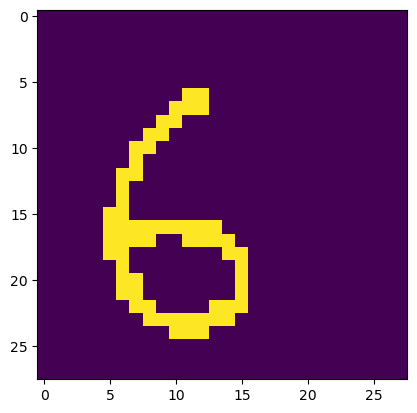

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 331
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

# Train-test split

In [46]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.2)

# fit the model using svc and also to salve the model using joblib

In [47]:
import joblib
from sklearn.svm import SVC
classifier = SVC(kernel="linear",random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier,"model/digit_recognizer")

['model/digit_recognizer']

# calculate accuracy

In [48]:
from sklearn import metrics
prediction = classifier.predict(test_x)
print("Accuracy = ",metrics.accuracy_score(prediction,test_y))

Accuracy =  0.97
